In [1]:
from pandas_datareader import data
import pandas as pd
import quandl
import matplotlib.pyplot as plt
import datetime
import numpy as np
import tensorflow as tf
import keras

Using TensorFlow backend.


In [4]:
# We will look at stock prices over the past year, starting at January 1, 2016
start = datetime.datetime(2018,12,1)
end = datetime.date.today() #time(2019,2,28) #date.today()
 
# Let's get Apple stock data; Apple's ticker symbol is AAPL
# First argument is the series we want, second is the source ("yahoo" for Yahoo! Finance), third is the start date, fourth is the end date
s = "NVDA"
dataset = quandl.get("WIKI/" + s, start_date=start, end_date=end)
 
type(dataset)

dataset.head()




LimitExceededError: (Status 429) (Quandl Error QELx01) You have exceeded the anonymous user limit of 50 calls per day. To make more calls today, please register for a free Quandl account and then include your API key with your requests.

In [5]:
# Define the instruments to download. We would like to see Apple, Microsoft and the S&P500 index.
ticker = ['NVDA'] #, 'MSFT', '^GSPC']
start_date = datetime.datetime(2012,1,1)
end_date = datetime.date.today() #time(2019,3,1) #today() #datetime(2016,12,30) #date.today()

# User pandas_reader.data.DataReader to load the desired data. As simple as that.
dataset = data.DataReader(ticker, 'yahoo', start_date, end_date)

type(dataset)

dataset.head()

#print(panel_data)
# p_d = panel_data.iloc[:, 1:2].values
#panel_data.head()

Attributes,High,Low,Open,Close,Volume,Adj Close
Symbols,NVDA,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,,
2012-01-03,14.40,14.01,14.30,14.04,11701100.0,12.922127
2012-01-04,14.26,13.92,14.05,14.20,8684300.0,13.069386
2012-01-05,14.78,14.07,14.13,14.71,14088700.0,13.538781
2012-01-06,14.71,14.37,14.70,14.54,13331300.0,13.382315
2012-01-09,14.82,14.44,14.55,14.54,12706100.0,13.382315


In [6]:
dataset.isna().any()


Attributes  Symbols
High        NVDA       False
Low         NVDA       False
Open        NVDA       False
Close       NVDA       False
Volume      NVDA       False
Adj Close   NVDA       False
dtype: bool

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2069 entries, 2012-01-03 to 2020-03-24
Data columns (total 6 columns):
(High, NVDA)         2069 non-null float64
(Low, NVDA)          2069 non-null float64
(Open, NVDA)         2069 non-null float64
(Close, NVDA)        2069 non-null float64
(Volume, NVDA)       2069 non-null float64
(Adj Close, NVDA)    2069 non-null float64
dtypes: float64(6)
memory usage: 113.1 KB


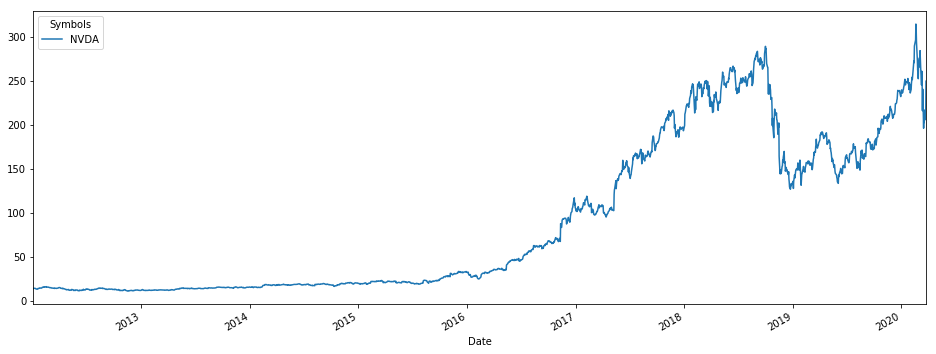

In [8]:
dataset['Close'].plot(figsize=(16,6))

In [10]:
# convert column "a" of a DataFrame
dataset["Close"] = dataset["Close"].replace(',', '').astype(float)

In [11]:
# 7 day rolling mean
dataset.rolling(7).mean().head(20)

Attributes,High,Low,Open,Close,Volume,Adj Close
Symbols,NVDA,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-05,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-06,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-09,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-10,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-11,14.602857,14.188571,14.405714,14.385714,1.232521e+07,13.240314
2012-01-12,14.578571,14.157143,14.394286,14.394286,1.298350e+07,13.248203


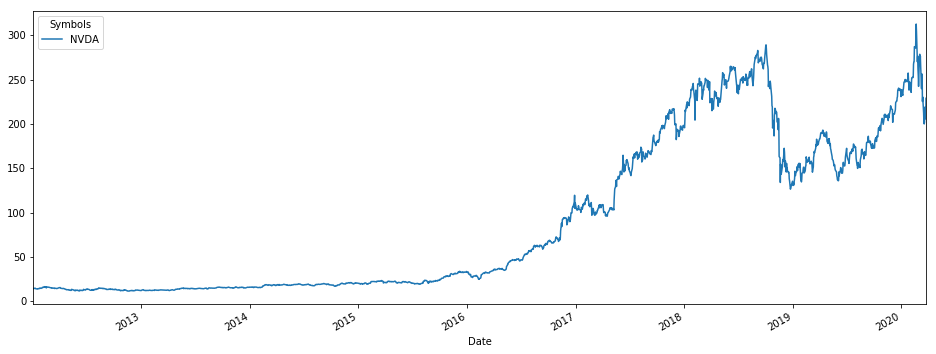

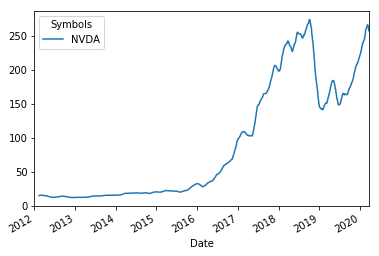

In [12]:
dataset['Open'].plot(figsize=(16,6))
dataset.rolling(window=30).mean()['Close'].plot()

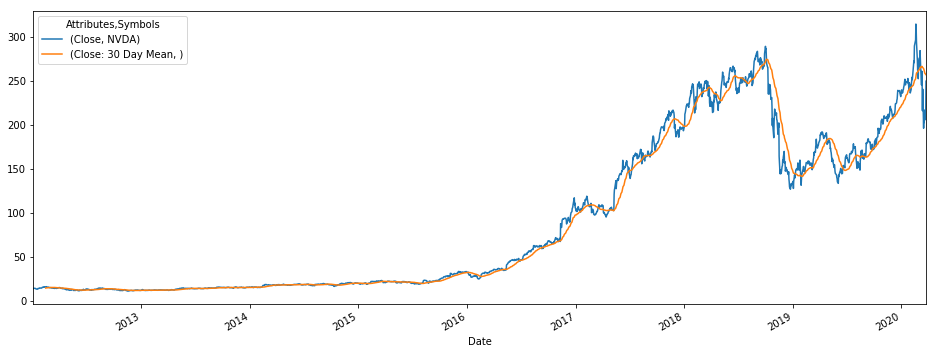

In [13]:
dataset['Close: 30 Day Mean'] = dataset['Close'].rolling(window=30).mean()
dataset[['Close','Close: 30 Day Mean']].plot(figsize=(16,6))

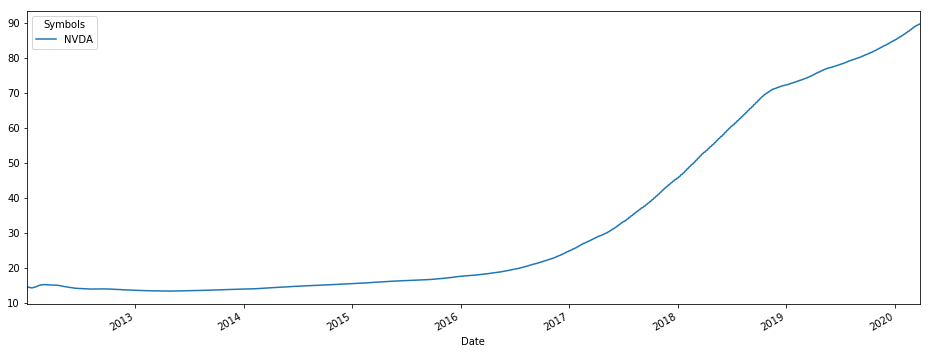

In [14]:
# Optional specify a minimum number of periods
dataset['Close'].expanding(min_periods=1).mean().plot(figsize=(16,6))

In [16]:
training_set=dataset['Open']
training_set=pd.DataFrame(training_set)

In [17]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1820 entries, 2012-01-03 to 2019-03-28
Data columns (total 1 columns):
NVDA    1820 non-null float64
dtypes: float64(1)
memory usage: 28.4 KB


In [18]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1820):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [19]:
#Building the RNN LSTM model
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasRegressor
from keras.layers import Dense, Activation
from keras.layers import LSTM
from keras.layers import Dropout

In [20]:
# Initialising the RNN
regressor = Sequential()

In [21]:


# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.4))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.4))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.4))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.4))

# Adding the output layer
regressor.add(Dense(units = 1))



In [22]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 50, batch_size = 20)

Epoch 1/50
1760/1760 [==============================] - 65s 37ms/step - loss: 0.0165
Epoch 2/50
1760/1760 [==============================] - 51s 29ms/step - loss: 0.0055
Epoch 3/50
1760/1760 [==============================] - 51s 29ms/step - loss: 0.0043
Epoch 4/50
1760/1760 [==============================] - 51s 29ms/step - loss: 0.0041
Epoch 5/50
1760/1760 [==============================] - 52s 29ms/step - loss: 0.0045
Epoch 6/50
1760/1760 [==============================] - 51s 29ms/step - loss: 0.0044
Epoch 7/50
1760/1760 [==============================] - 51s 29ms/step - loss: 0.0044
Epoch 8/50
1760/1760 [==============================] - 51s 29ms/step - loss: 0.0034
Epoch 9/50
1760/1760 [==============================] - 51s 29ms/step - loss: 0.0032
Epoch 10/50
1760/1760 [==============================] - 51s 29ms/step - loss: 0.0030
Epoch 11/50
1760/1760 [==============================] - 51s 29ms/step - loss: 0.0040
Epoch 12/50
1760/1760 [==============================] - 51s 29

In [50]:
# Define the instruments to download. We would like to see Apple, Microsoft and the S&P500 index.
ticker = ['NVDA'] #, 'MSFT', '^GSPC']
start_date = datetime.datetime(2018,1,1)
end_date = datetime.date.today() #datetime(2016,12,30) #date.today()

# User pandas_reader.data.DataReader to load the desired data. As simple as that.
dataset_test = data.DataReader(ticker, 'yahoo', start_date, end_date)

type(dataset_test)

dataset_test.head()

Attributes,High,Low,Open,Close,Volume,Adj Close
Symbols,NVDA,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,,
2018-01-02,199.500000,194.500000,195.779999,199.350006,8890400.0,198.590637
2018-01-03,213.699997,203.750000,204.100006,212.470001,22867600.0,211.660645
2018-01-04,218.050003,212.690002,215.759995,213.589996,14581700.0,212.776382
2018-01-05,216.910004,211.080002,214.190002,215.399994,14503100.0,214.579498
2018-01-08,225.000000,218.580002,220.399994,222.000000,22030400.0,221.154343


In [51]:
real_stock_price = dataset_test.iloc[:, 1:2].values

In [43]:
dataset_test.head()

Attributes,High,Low,Open,Close,Volume,Adj Close
Symbols,NVDA,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,,
2017-01-03,106.370003,99.379997,104.400002,102.010002,37549900.0,101.227043
2017-01-04,105.500000,101.529999,103.400002,104.389999,29980500.0,103.588776
2017-01-05,105.820000,101.050003,104.529999,101.739998,24607400.0,100.959106
2017-01-06,104.250000,101.199997,102.849998,103.099998,20571400.0,102.308678
2017-01-09,108.000000,103.500000,103.500000,107.279999,22857700.0,106.456596


In [44]:
#check column  matching between training_set and test_set
training_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1820 entries, 2012-01-03 to 2019-03-28
Data columns (total 1 columns):
NVDA    1820 non-null float64
dtypes: float64(1)
memory usage: 28.4 KB


In [52]:
test_set=dataset_test['Open']
test_set=pd.DataFrame(test_set)

In [53]:
dataset_test.info()
test_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 311 entries, 2018-01-02 to 2019-03-28
Data columns (total 6 columns):
(High, NVDA)         311 non-null float64
(Low, NVDA)          311 non-null float64
(Open, NVDA)         311 non-null float64
(Close, NVDA)        311 non-null float64
(Volume, NVDA)       311 non-null float64
(Adj Close, NVDA)    311 non-null float64
dtypes: float64(6)
memory usage: 17.0 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 311 entries, 2018-01-02 to 2019-03-28
Data columns (total 1 columns):
NVDA    311 non-null float64
dtypes: float64(1)
memory usage: 4.9 KB


In [54]:

# Getting the predicted stock price
dataset_total = pd.concat((dataset['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []

for i in range(60, 371):  ## maximum range depends on test_set entries, e.g. 776 + 60 = 332
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


In [55]:
predicted_stock_price=pd.DataFrame(predicted_stock_price)
predicted_stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 1 columns):
0    311 non-null float32
dtypes: float32(1)
memory usage: 1.3 KB


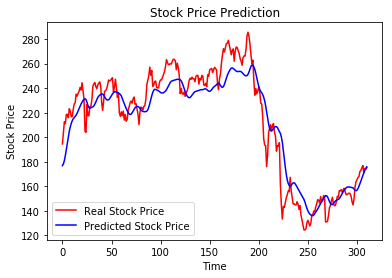

In [56]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
